In [19]:
lol = np.zeros(X.size)
for i, x in enumerate(X):
    lol[i] = devel.model(x, true_poles, true_residues)

<ipython-input-19-338bec54f631>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  lol[i] = devel.model(x, true_poles, true_residues)


In [20]:
lol

array([ 2.97401592e-01,  3.52956181e-01,  4.39313132e-01,  5.94548454e-01,
        9.70313873e-01,  4.51533700e+00, -3.21964875e+00, -7.97948122e-01,
       -4.17858380e-01, -2.54717086e-01, -1.57769276e-01, -8.72713010e-02,
       -2.62095487e-02,  3.76262352e-02,  1.22040390e-01,  2.80499708e-01,
        9.25199010e-01, -5.89218441e+00, -2.87638258e-01, -6.62432337e-02,
        1.29288601e-01,  9.46451714e-01,  1.48674528e-01, -4.90074814e+00,
        3.99641521e-01, -5.88849493e-02, -1.04635116e-01, -1.13512501e-01,
       -1.23569048e-01, -1.38843326e-01,  1.19308134e+00,  1.91602885e-01,
        1.41964550e-01,  1.60541503e-01,  2.23738823e-01,  3.75891137e-01,
        9.40178444e-01, -1.12840881e+00, -6.25877339e-01, -3.81454313e-01,
       -2.84053253e-01, -2.32736837e-01, -2.02378136e-01, -1.84399093e-01,
       -1.76148852e-01, -1.78984663e-01, -2.01084096e-01, -2.69373240e-01,
        7.33815545e+00,  3.06713906e-01,  1.43672424e-01,  1.06627870e-01,
        1.01673070e-01,  

Directories exist; saving data


array([[  2.07031203+0.07926449j,  -0.03674822+0.07374412j,
         -0.02894552+0.06703913j, ...,   5.9742719 -0.86075396j,
          3.94643304-0.8047183j ,  -2.66921875-0.75016984j],
       [  8.09174152+0.08132861j,   1.50295865+0.0759421j ,
         -7.72694336+0.06937185j, ...,   8.168046  -0.87224442j,
         -5.38116022-0.81297379j,  -4.29253552-0.75588574j],
       [ -6.48665862+0.08343187j,   0.97202657+0.07818729j,
          2.28976794+0.07176151j, ...,   7.3355774 -0.88382509j,
          4.19673609-0.82113388j,   9.55267531-0.76141355j],
       ...,
       [-13.49187649+0.26878789j, -13.74088037+0.28033506j,
          1.63011473+0.29286975j, ...,  -7.12584671-0.44838644j,
          2.81822774-0.39883973j,   1.31217681-0.36441264j],
       [  2.9769127 +0.26881993j,   5.75045671+0.2802306j ,
         -7.35952015+0.29258958j, ...,  -8.6364972 -0.44970163j,
         12.10772649-0.4005888j ,  -5.11562352-0.36595724j],
       [  7.01804461+0.26881666j,  -9.61113237+0.28008818j

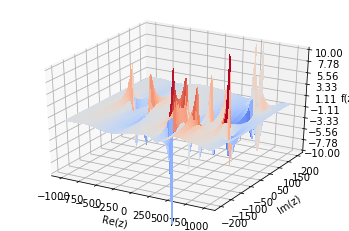

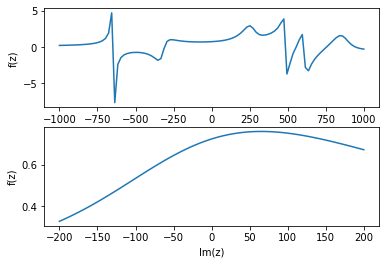

In [123]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from rmm import rmm_utils
from rmm import rmm_plot
from rmm import devel


# Generate toy model data

importlib.reload(rmm_utils)
importlib.reload(rmm_plot)
importlib.reload(devel)
np.random.seed(450)

# Parameters
path = 'training_data/vectorized'
number_of_poles = 10
true_poles = rmm_utils.random_poles(number_of_poles, [[-1000, 1000], [-200,200]])
#true_residues = 10*np.random.rand(number_of_poles)
true_residues = 100*np.exp(1j*2*np.pi*np.random.rand(number_of_poles))
X = np.linspace(-1000,1000,100)
Y = np.linspace(-200, 200, 100)

model = np.vectorize(devel.model, excluded = [1, 2, 3, 4], otypes=['complex128'])

complex_data = devel.generate_true_data(path, X, Y, true_poles, true_residues)
rmm_utils.add_gaussian_noise(path, 10)

In [108]:
X

array([-1000.        ,  -979.7979798 ,  -959.5959596 ,  -939.39393939,
        -919.19191919,  -898.98989899,  -878.78787879,  -858.58585859,
        -838.38383838,  -818.18181818,  -797.97979798,  -777.77777778,
        -757.57575758,  -737.37373737,  -717.17171717,  -696.96969697,
        -676.76767677,  -656.56565657,  -636.36363636,  -616.16161616,
        -595.95959596,  -575.75757576,  -555.55555556,  -535.35353535,
        -515.15151515,  -494.94949495,  -474.74747475,  -454.54545455,
        -434.34343434,  -414.14141414,  -393.93939394,  -373.73737374,
        -353.53535354,  -333.33333333,  -313.13131313,  -292.92929293,
        -272.72727273,  -252.52525253,  -232.32323232,  -212.12121212,
        -191.91919192,  -171.71717172,  -151.51515152,  -131.31313131,
        -111.11111111,   -90.90909091,   -70.70707071,   -50.50505051,
         -30.3030303 ,   -10.1010101 ,    10.1010101 ,    30.3030303 ,
          50.50505051,    70.70707071,    90.90909091,   111.11111111,
      

In [100]:
model(X[50] + 1j* Y[15], true_poles, true_residues)

array(0.48708202+0.43153312j)

In [90]:
X[50]

10.101010101010047